In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# **Data Collection & Analysis**

In [27]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [28]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [29]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [30]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [31]:
# checking for missing values
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


# **Choosing the Annual Income Column & Spending Score column**

In [32]:
X = customer_data.iloc[:,[3,4]].values

In [33]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

# **Choosing the number of clusters**

***WCSS -> Within Clusters Sum of Squares***

In [34]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

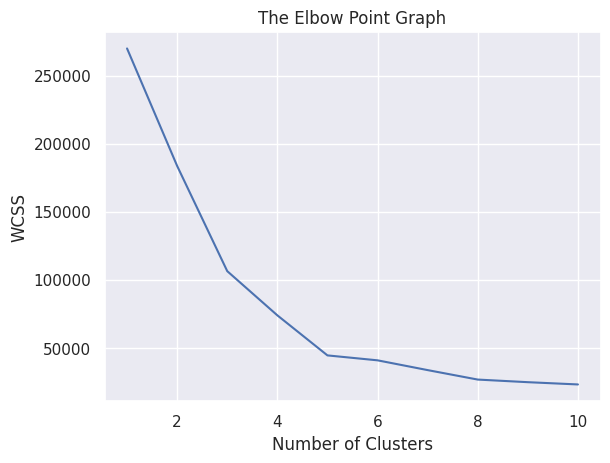

In [35]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### ***Optimal Number of Clusters = 5***

# **Training the k-Means Clustering Model**

In [36]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


### ***5 Clusters - 0, 1, 2, 3, 4***

# **Visualizing all the Clusters**

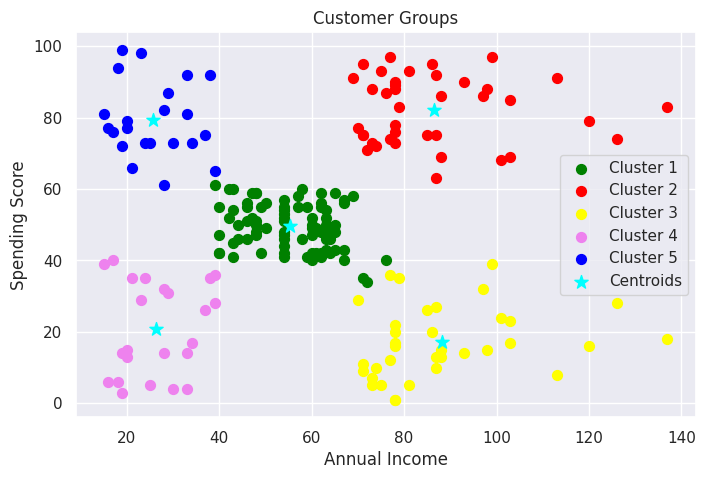

In [37]:
import matplotlib.pyplot as plt

# Plotting the clusters
plt.figure(figsize=(8, 5))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s=50, c='blue', label='Cluster 5')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=100, c='cyan', marker='*', label='Centroids')

# Adding the legend
plt.legend()

# Adding titles and labels
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

# Saving and showing the plot
plt.savefig('customer_groups.png')  # Save the plot
plt.show()

In [38]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score to evaluate the clustering performance
score = silhouette_score(X, kmeans.labels_)

print(f"Silhouette Score: {score:.4f}")


Silhouette Score: 0.5539


In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is the original dataset with customer features
# Scale the data using StandardScaler (or use any other scaler you have applied previously)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)  # Scale the features of the dataset

# Apply PCA to reduce data to 2 components
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Print the explained variance ratio to understand how much variance is captured by each component
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")





Explained Variance Ratio: [0.50495142 0.49504858]


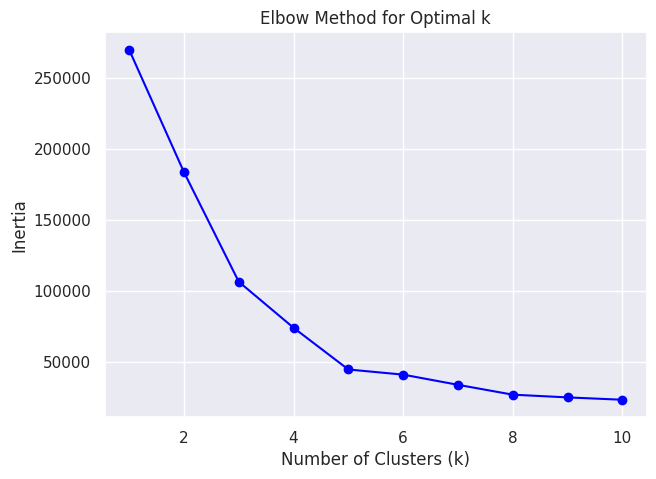

In [40]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Range of cluster values to test
inertia = []
k_range = range(1, 11)  # Testing 1 to 10 clusters

# Fit KMeans for each value of k and compute the inertia (within-cluster sum of squares)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(7,5))
plt.plot(k_range, inertia, marker='o', color='blue')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [41]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for the optimal number of clusters (e.g., 5 clusters)
score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score for {k} clusters: {score:.4f}")


Silhouette Score for 10 clusters: 0.4426


Cluster Centroids:
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


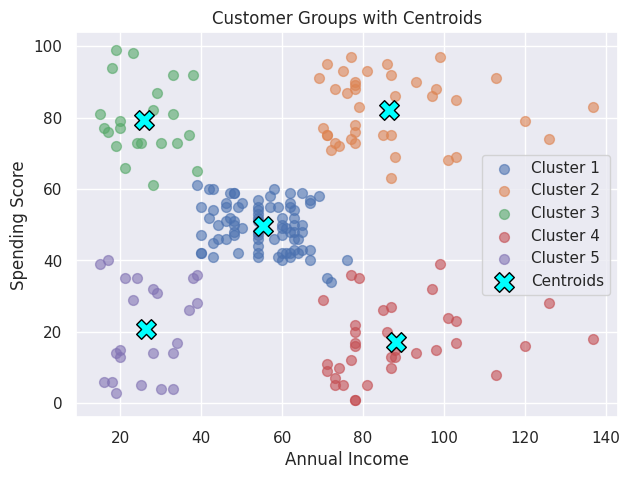

In [42]:
# After determining the optimal number of clusters (e.g., 5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Output the cluster centers (centroids)
print(f"Cluster Centroids:\n{kmeans.cluster_centers_}")

# Visualize clusters and their centroids
plt.figure(figsize=(7, 5))

# Plot each cluster
for i in range(5):
    plt.scatter(X[kmeans.labels_ == i, 0], X[kmeans.labels_ == i, 1], s=50, label=f'Cluster {i+1}', alpha=0.6)

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='cyan', marker='X', label='Centroids', edgecolors='black')

plt.title('Customer Groups with Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.savefig('customer_groups_with_centroids.png', dpi=300, bbox_inches='tight')
plt.show()


Explained Variance Ratio: [0.50495142 0.49504858]


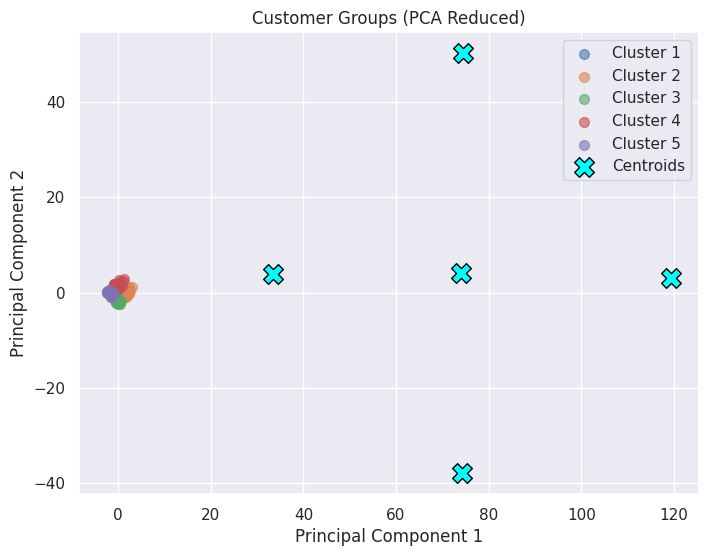

In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale the data using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)  # Scale the features of the dataset

# Apply PCA to reduce the data to 2 components
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Print the explained variance ratio to understand how much variance is captured by each component
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

# Visualize the clusters in 2D using PCA components
plt.figure(figsize=(8, 6))

# Plot each cluster using PCA components
for i in range(5):
    plt.scatter(data_pca[kmeans.labels_ == i, 0], data_pca[kmeans.labels_ == i, 1], s=50, label=f'Cluster {i+1}', alpha=0.6)

# Plot the centroids
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], s=200, c='cyan', marker='X', label='Centroids', edgecolors='black')

plt.title('Customer Groups (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.savefig('customer_groups_pca.png', dpi=300, bbox_inches='tight')
plt.show()


# **RESULT**

**The customers were grouped into 5 distinct clusters, with the following key insights:**

Cluster 1: Medium-income customers with moderate spending.

Cluster 2: High-income customers with high spending (potential premium customers).

Cluster 3: Low-income customers with high spending (budget-conscious but willing to spend on certain items).

Cluster 4: High-income customers with low spending (price-sensitive or savings-focused).

Cluster 5: Low-income customers with low spending (budget-conscious customers).


*These clusters provide a foundation for businesses to personalize marketing strategies, identify premium customers, target value-driven groups, and tailor promotions to specific customer segments.*